In [67]:
import pandas as pd
import matplotlib.pyplot as plt

====== CARGAR EL DATASET =======

In [68]:
# Carga de archivos
try:
    # archivo csv con separador';' 
    df = pd.read_csv(r'C:\\Users\\ander\\Escritorio\\PYTHON\\Python 2025\\machine_learning\\datasets\\Salary_Data.csv', sep=',', encoding='utf-8-sig')
    print('✅ Archivo cargado correctamente')
except FileNotFoundError:
    print('❌ Error al cargar el archivo')

✅ Archivo cargado correctamente


In [69]:
# Información del dataset
print(f'''
    Tamaño del dataset: \n{df.shape}\n\n
    Informaciáon básica: \n{df.info}\n\n
    columnas: \n{df.columns}\n\n
    Valores nulos: \n{df.isnull().sum()}\n\n
    Valores únicos: \n{df.nunique()}\n\n
''')


    Tamaño del dataset: 
(375, 6)


    Informaciáon básica: 
<bound method DataFrame.info of       Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1             

In [70]:
# Estadísticas descriptivas
print(f' Estadística Descriptiva: \n{df.describe().T}')  # .T transpone filas con columnas

 Estadística Descriptiva: 
                     count           mean           std    min      25%  \
Age                  373.0      37.431635      7.069073   23.0     31.0   
Years of Experience  373.0      10.030831      6.557007    0.0      4.0   
Salary               373.0  100577.345845  48240.013482  350.0  55000.0   

                         50%       75%       max  
Age                     36.0      44.0      53.0  
Years of Experience      9.0      15.0      25.0  
Salary               95000.0  140000.0  250000.0  


In [71]:
# primeras columnas
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [72]:
# tramamiento de valores nulos
df_clean = df.dropna()


=== REGRESIÓN LINEAL SIMPLE ===

In [73]:
df_clean.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

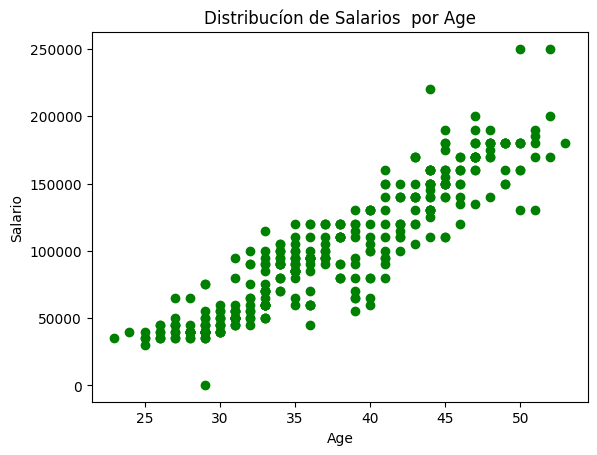

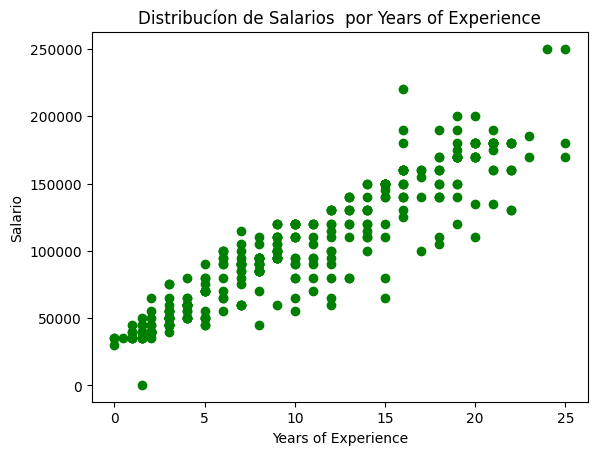

In [74]:
cols = ['Age', 'Years of Experience']
for col in cols:
    plt.plot(df_clean[col],df_clean['Salary'], 'go')
    plt.title(f'Distribucíon de Salarios  por {col}')
    plt.xlabel(col)
    plt.ylabel('Salario')
    plt.show()

In [75]:
# Importamos las librerías
# no es recomendable usar todos los datos para predecir
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # califican el modelo de regresión

# Variable independiente
df_clean['Age']
X = df_clean[['Age']].values.reshape(-1, 1)

# Variable dependiente
y = df_clean['Salary'].values 

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

X_train: (298, 1)
X_test: (75, 1)


In [76]:
# creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_predict = model.predict(X_test)

# Valores que el modelo predice en base a los datos de prueba
y_predict[:5]

array([166228.07078644, 109602.74005552, 141061.25712825,  78144.22298279,
       134769.55371371])

In [77]:
# Calificación del modelo
print('Predicciones: {}, Reales: {}'.format(y_predict[:4].round(2), y_test[:4]))

Predicciones: [166228.07 109602.74 141061.26  78144.22], Reales: [180000.  65000. 125000.  80000.]


In [78]:
import numpy as np
# variables RMSE, indica que tanto varian los datos de la predicción respoect a los reales
mse = mean_squared_error(y_test, y_predict)
print(f'MSE: {mse}')
rmse = np.sqrt(mse).round(2)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_predict)
print(f'R2: {r2}')

MSE: 362326711.91360664
RMSE: 19034.88
R2: 0.8488782955782094


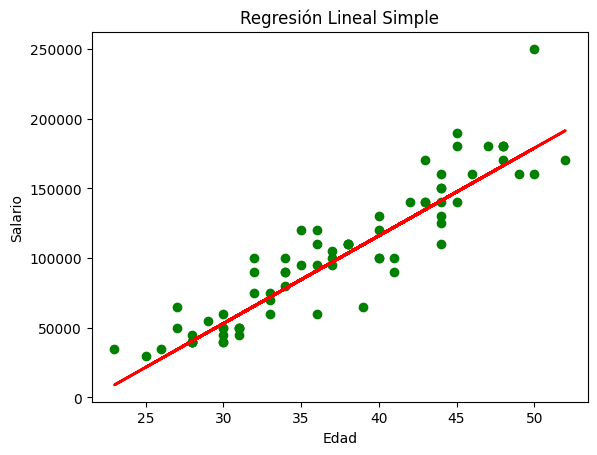

In [79]:
# Graficamos los datos
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.title('Regresión Lineal Simple')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

Predicciones: [174795.47  99746.98 140682.52  72456.62], Reales: [180000.  65000. 125000.  80000.]
MSE: 241834883.8999349
RMSE: 15551.04
R2: 0.8991338517367767


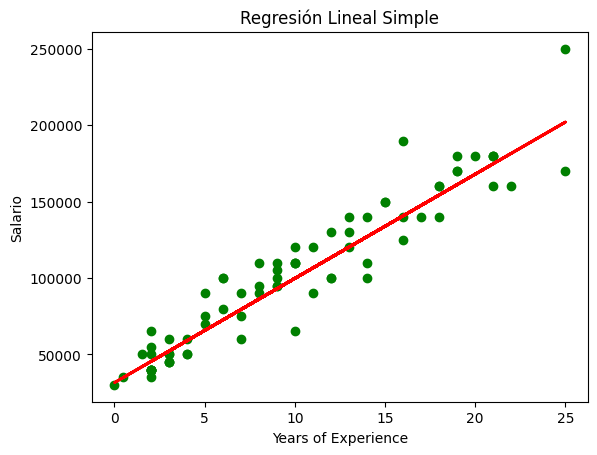

In [80]:
# función para el modelo
def simple_model(var_independiente):
    X = df_clean[[var_independiente]].values.reshape(-1, 1)
    y = df_clean['Salary'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('Predicciones: {}, Reales: {}'.format(y_predict[:4].round(2), y_test[:4]))
    
    mse = mean_squared_error(y_test, y_predict)
    print(f'MSE: {mse}')
    rmse = np.sqrt(mse).round(2)
    print(f'RMSE: {rmse}')
    r2 = r2_score(y_test, y_predict)
    print(f'R2: {r2}')
    
    plt.scatter(X_test, y_test, color='green')
    plt.plot(X_test, y_predict, color='red', linewidth=2)
    plt.title('Regresión Lineal Simple')
    plt.xlabel(var_independiente)
    plt.ylabel('Salario')
    plt.show()
    
simple_model('Years of Experience')

===== REGRESIÓN LINEAL MÚLTIPLE =====

Predicciones: [171912.18 103906.32 141242.01  74586.75], Reales: [180000.  65000. 125000.  80000.]
MSE: 267299022.86077455
RMSE: 16349.28
R2: 0.8885130944068205


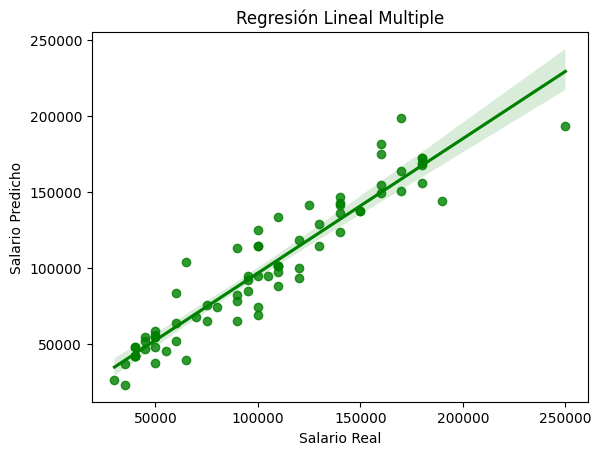

In [81]:
import seaborn as sns
# regresion lineal multiple
X = df_clean.drop(['Salary','Gender', 'Education Level', 'Job Title'], axis=1).values
y = df_clean['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Predicciones: {}, Reales: {}'.format(y_predict[:4].round(2), y_test[:4]))

mse = mean_squared_error(y_test, y_predict)
print(f'MSE: {mse}')
rmse = np.sqrt(mse).round(2)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, y_predict)
print(f'R2: {r2}')

sns.regplot(x=y_test, y=y_predict, color='green')
plt.title('Regresión Lineal Multiple')
plt.xlabel('Salario Real')
plt.ylabel('Salario Predicho')
plt.show()


===== MODELOS DE REGRESIÓN POLINÓMICA =====

In [111]:
# cargar datos
try:
    
    df_pol = pd.read_csv(r'C:\\Users\\ander\\Escritorio\\PYTHON\\Python 2025\\machine_learning\\datasets\\data.csv', sep=',', encoding='utf-8-sig')
    print('✅ Archivo cargado correctamente')
except FileNotFoundError:
    print('❌ Error al cargar el archivo')
   

✅ Archivo cargado correctamente


In [112]:
df_pol.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [113]:
 # Información del dataset
print(f'''
    Tamaño del dataset: \n{df_pol.shape}\n\n
    Informaciáon básica: \n{df_pol.info}\n\n
    columnas: \n{df_pol.columns}\n\n
    Valores nulos: \n{df_pol.isnull().sum()}\n\n
    Valores únicos: \n{df_pol.nunique()}\n\n
''')


    Tamaño del dataset: 
(511, 14)


    Informaciáon básica: 
<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
506  0.98765   0.0  12.50     0  0.561  6.980  89.0  2.0980    3  320   
507  0.23456   0.0  12.50     0  0.561  6.980  76.0  2.6540    3  320   
508  0.44433   0.0  12.50     0  0.561  6.123  98.0  2.9870    3  320   
509  0.77763   0.0  12.70     0  0.561  6.222  34.0  2.5430    3  329   
510  0.65432   0.0  12.80     0  0.561  6.760  67.0  2.9870    3  345   

     PTRATIO       B  LSTAT

In [116]:
# cambiar nombres de columnas para mejorar la visualización
df_pol_rename= {
    'CRIM': 'delitos',
    'ZN': 'zona',
    'INDUS': 'industria',
    'CHAS': 'río',
    'NOX': 'óxido',
    'RM': 'habitaciones',
    'AGE': 'edad',
    'DIS': 'distancia',
    'RAD': 'radio',
    'TAX': 'impuesto',
    'PTRATIO': 'población',
    'B': 'b',
    'LSTAT': 'pobreza',
    'MEDV': 'precio'
}
df = df_pol.rename(columns=df_pol_rename)
print(df.columns)



Index(['delitos', 'zona', 'industria', 'río', 'óxido', 'habitaciones', 'edad',
       'distancia', 'radio', 'impuesto', 'población', 'b', 'pobreza',
       'precio'],
      dtype='object')


In [117]:
# estadistica descriptiva
print(f' Estadística Descriptiva: \n{df.describe().T}')  # .T transpone filas con columnas

 Estadística Descriptiva: 
              count        mean         std        min         25%        50%  \
delitos       511.0    3.584139    8.564433    0.00632    0.082325    0.26169   
zona          511.0   11.252446   23.234838    0.00000    0.000000    0.00000   
industria     511.0   11.151096    6.828175    0.46000    5.190000    9.69000   
río           511.0    0.068493    0.252838    0.00000    0.000000    0.00000   
óxido         511.0    0.554757    0.115310    0.38500    0.449000    0.53800   
habitaciones  506.0    6.287589    0.703802    3.56100    5.885500    6.20900   
edad          511.0   68.616243   28.099130    2.90000   45.050000   77.30000   
distancia     511.0    3.783876    2.098631    1.12960    2.100350    3.15230   
radio         511.0    9.485323    8.688469    1.00000    4.000000    5.00000   
impuesto      511.0  407.440313  167.903532  187.00000  279.500000  330.00000   
población     511.0   18.500000    2.200348   12.60000   17.400000   19.10000   
b